In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

TOTAL_POINTS = 1000

In [2]:
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)


k_true = 0.7
b_true = 2.0

y = x*k_true+b_true+noise


<function matplotlib.pyplot.show(close=None, block=None)>

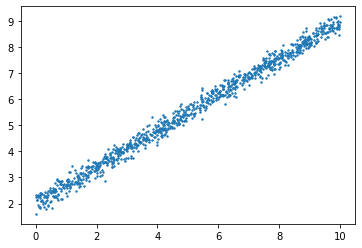

In [3]:
plt.scatter(x,y, s=2)
plt.show

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70116365>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9946204>


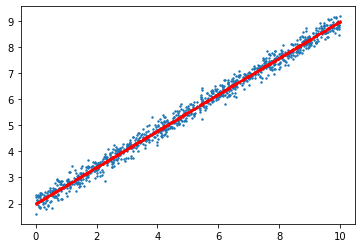

In [4]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500
learning_rate = 0.02

for n in range (EPOCHS):
    with tf.GradientTape() as t:
        f = k*x+b
        loss = tf.reduce_mean(tf.square(y-f))
        
    dk,db = t.gradient(loss,[k,b])
    k.assign_sub(learning_rate*dk)
    b.assign_sub(learning_rate*db)
    
print(k,b,sep="\n")

y_pr = k*x+b
plt.scatter (x,y,s=2)
plt.scatter(x, y_pr, c='r',s=2)
plt.show()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.69884235>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0100484>


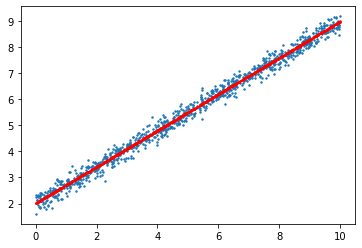

In [5]:
EPOCHS = 500
learning_rate = 0.02


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

for n in range (EPOCHS):
    for n_batch in range (num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k*x+b
            loss = tf.reduce_mean(tf.square(y-f))
        
        dk,db = t.gradient(loss,[k,b])
        
        k.assign_sub(learning_rate*dk)
        b.assign_sub(learning_rate*db)
        
print (k,b, sep = "\n")

y_pr = k*x+b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr,c = 'r',s = 2)
plt.show()

        

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.69884235>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0100484>


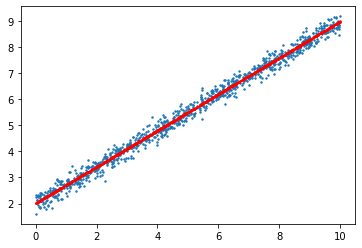

In [6]:
EPOCHS = 500
learning_rate = 0.02


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.keras.optimizers.SGD(learning_rate=0.02)

for n in range (EPOCHS):
    for n_batch in range (num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k*x+b
            loss = tf.reduce_mean(tf.square(y-f))
        
        dk,db = t.gradient(loss,[k,b])
        
        opt.apply_gradients(zip([dk,db],[k,b]))
#         k.assign_sub(learning_rate*dk)
#         b.assign_sub(learning_rate*db)
        
print (k,b, sep = "\n")

y_pr = k*x+b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr,c = 'r',s = 2)
plt.show()


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7377995>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0217748>


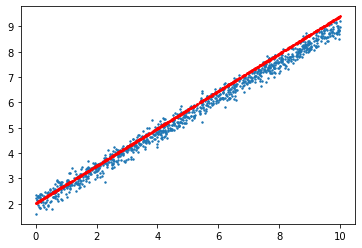

In [7]:
EPOCHS = 500
learning_rate = 0.02


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.keras.optimizers.Adadelta(learning_rate=3)

for n in range (EPOCHS):
    for n_batch in range (num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k*x+b
            loss = tf.reduce_mean(tf.square(y-f))
        
        dk,db = t.gradient(loss,[k,b])
        
        opt.apply_gradients(zip([dk,db],[k,b]))
#         k.assign_sub(learning_rate*dk)
#         b.assign_sub(learning_rate*db)
        
print (k,b, sep = "\n")

y_pr = k*x+b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr,c = 'r',s = 2)
plt.show()


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6988408>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0100586>


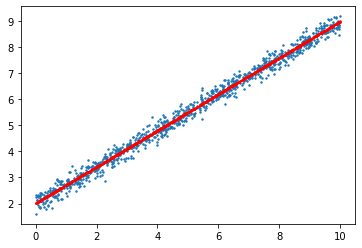

In [8]:
EPOCHS = 500
learning_rate = 0.02


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.keras.optimizers.Adagrad(learning_rate=3)

for n in range (EPOCHS):
    for n_batch in range (num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k*x+b
            loss = tf.reduce_mean(tf.square(y-f))
        
        dk,db = t.gradient(loss,[k,b])
        
        opt.apply_gradients(zip([dk,db],[k,b]))
#         k.assign_sub(learning_rate*dk)
#         b.assign_sub(learning_rate*db)
        
print (k,b, sep = "\n")

y_pr = k*x+b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr,c = 'r',s = 2)
plt.show()


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7038405>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0150607>


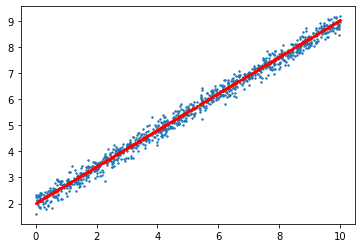

In [9]:
EPOCHS = 500
learning_rate = 0.02


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

k = tf.Variable(0.0)
b = tf.Variable(0.0)

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)

for n in range (EPOCHS):
    for n_batch in range (num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        
        with tf.GradientTape() as t:
            f = k*x+b
            loss = tf.reduce_mean(tf.square(y-f))
        
        dk,db = t.gradient(loss,[k,b])
        
        opt.apply_gradients(zip([dk,db],[k,b]))
#         k.assign_sub(learning_rate*dk)
#         b.assign_sub(learning_rate*db)
        
print (k,b, sep = "\n")

y_pr = k*x+b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr,c = 'r',s = 2)
plt.show()
